# Removing Noise From Images Using Gibbs Sampling

add description here of what it is 

Importing the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Lets create a gibbs function

In [2]:
def gibbs_denoising(img, n_steps, beta, interaction_param):
    
    # height and width give us how much we need to iterate over
    
    height, width = np.shape(img)
    f_img = np.copy(img)
    
    # repeat iteration nsteps time
    for n in range(n_steps):
        
        # this is where we iterate over the image
        for i in range(height):
            for j in range(width):
                
                # getting current energy of the system
                # since we have no energy function here, lets say energy = f_img[i,j]*img[i,j]
                E_prev = f_img[i][j] * img[i][j]
                
                # modifying the energy based on the surrounding pixels - this is the Ising model
                for px, py in [[1, 0], [-1, 0], [0, 1], [0, -1]]:
                    
                    # ensuring bounds are not broken
                    if (i+px) >= 0 and (i+px) < height:
                        if (j+py) >= 0 and (j+py) < width:
                            
                            # calcualting E_prev again with interaction 
                            E_prev -= interaction_param * f_img[i+px][j+py] * img[i+px][j+py]
                
                # check energy again if the pixel is flipped
                
                f_img[i][j] = -1 * f_img[i][j]

                # getting energy of the modified system
                E_new = f_img[i][j] * img[i][j]
                
                # modifying the energy based on the surrounding pixels - this is the Ising model
                for px, py in [[1, 0], [-1, 0], [0, 1], [0, -1]]:
                    
                    # ensuring bounds are not broken
                    if (i+px) >= 0 and (i+px) < height:
                        if (j+py) >= 0 and (j+py) < width:
                            
                            # calcualting E_prev again with interaction 
                            E_new -= interaction_param * f_img[i+px][j+py] * img[i+px][j+py]
                
                # calculating the probability from boltzman's distribution
                prob = np.exp(-beta * (E_new - E_prev))
                
                # comparing to a random value and revert the result to original if cond met
                if np.random.uniform() > prob:
                    f_img[i][j] = -1 * f_img[i][j]
                    
    return f_img
                

Lets test the function out, we will use the camera man picture as the base photo

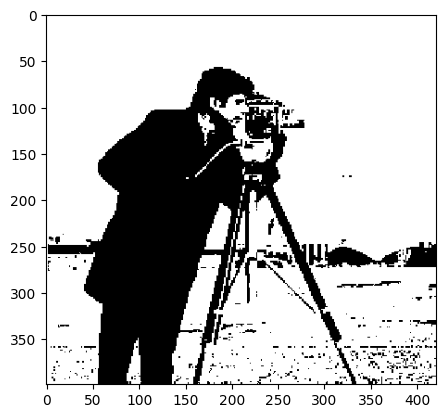

In [3]:
# getting the image
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)

# binarization
(_, img_bw) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# printing the image
plt.imshow(img_bw, cmap='gray', vmin=0, vmax=255)

The image above is not yellow but white, jupyter notebook just makes it yellow. Now that we have the image. lets add noise to it code for which can be found below

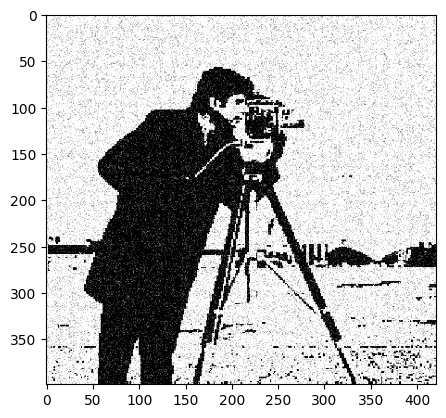

In [4]:
# adding noise to the image
img_noisy = img_bw + np.random.normal(loc=0, scale=50, size=np.shape(img))

# printing the image
plt.imshow(img_noisy, cmap='gray', vmin=0, vmax=255)

C:\Users\westw\AppData\Local\Temp\ipykernel_16224\2223472770.py:47: RuntimeWarning: overflow encountered in exp
  prob = np.exp(-beta * (E_new - E_prev))


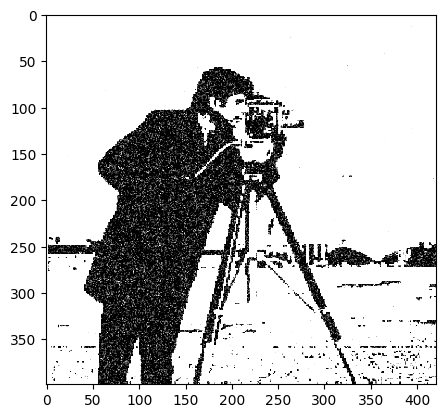

In [7]:
# setting paramaters
n_steps = 30
beta = 0.1
interaction_param = 0.2

# denoising the image
img_denoised = img_noisy - gibbs_denoising(img_noisy, n_steps, beta, interaction_param)

# printing the image
plt.imshow(img_denoised, cmap='gray', vmin=0, vmax=255)